<a href="https://colab.research.google.com/github/UrviSoni/pytorch_deeplearning/blob/master/Save_and_Load_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model


In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


In [9]:
!wget  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2018-12-23 09:39:46--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.4’

helper.py.4         100%[===================>]   2.75K  --.-KB/s    in 0s      

2018-12-23 09:39:46 (46.7 MB/s) - ‘helper.py.4’ saved [2813/2813]



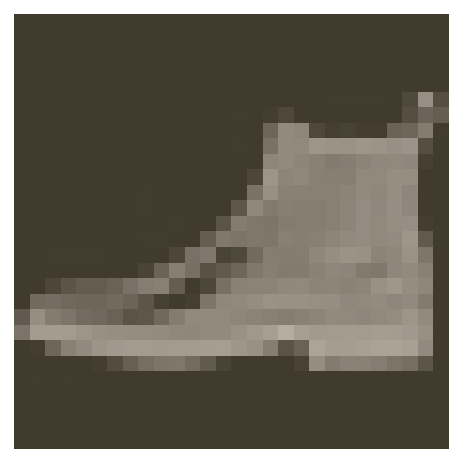

In [14]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);
plt.grid(False)


In [0]:
# Create the network, define the criterion and optimizer

model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [12]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)


Epoch: 1/2..  Training Loss: 1.668..  Test Loss: 0.965..  Test Accuracy: 0.649
Epoch: 1/2..  Training Loss: 1.007..  Test Loss: 0.761..  Test Accuracy: 0.696
Epoch: 1/2..  Training Loss: 0.861..  Test Loss: 0.674..  Test Accuracy: 0.743
Epoch: 1/2..  Training Loss: 0.791..  Test Loss: 0.627..  Test Accuracy: 0.759
Epoch: 1/2..  Training Loss: 0.753..  Test Loss: 0.642..  Test Accuracy: 0.744
Epoch: 1/2..  Training Loss: 0.709..  Test Loss: 0.602..  Test Accuracy: 0.771
Epoch: 1/2..  Training Loss: 0.707..  Test Loss: 0.584..  Test Accuracy: 0.781
Epoch: 1/2..  Training Loss: 0.668..  Test Loss: 0.562..  Test Accuracy: 0.791
Epoch: 1/2..  Training Loss: 0.658..  Test Loss: 0.596..  Test Accuracy: 0.780
Epoch: 1/2..  Training Loss: 0.626..  Test Loss: 0.556..  Test Accuracy: 0.797
Epoch: 1/2..  Training Loss: 0.660..  Test Loss: 0.536..  Test Accuracy: 0.800
Epoch: 1/2..  Training Loss: 0.609..  Test Loss: 0.527..  Test Accuracy: 0.806
Epoch: 1/2..  Training Loss: 0.635..  Test Loss: 0.5

In [15]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())


Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [0]:
torch.save(model.state_dict(), 'checkpoint.pth')


In [18]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())


odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [0]:
model.load_state_dict(state_dict)


In [20]:
# Try this
model = fc_model.Network(784, 10, [400, 200, 100])
# This will throw an error because the tensor sizes are wrong!
model.load_state_dict(state_dict)


RuntimeError: ignored

In [0]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')


In [0]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [24]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)
